In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('kaggle_movie_train.csv')
     

Exploring the dataset

In [3]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [4]:
df.shape

(22579, 3)

In [5]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [6]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

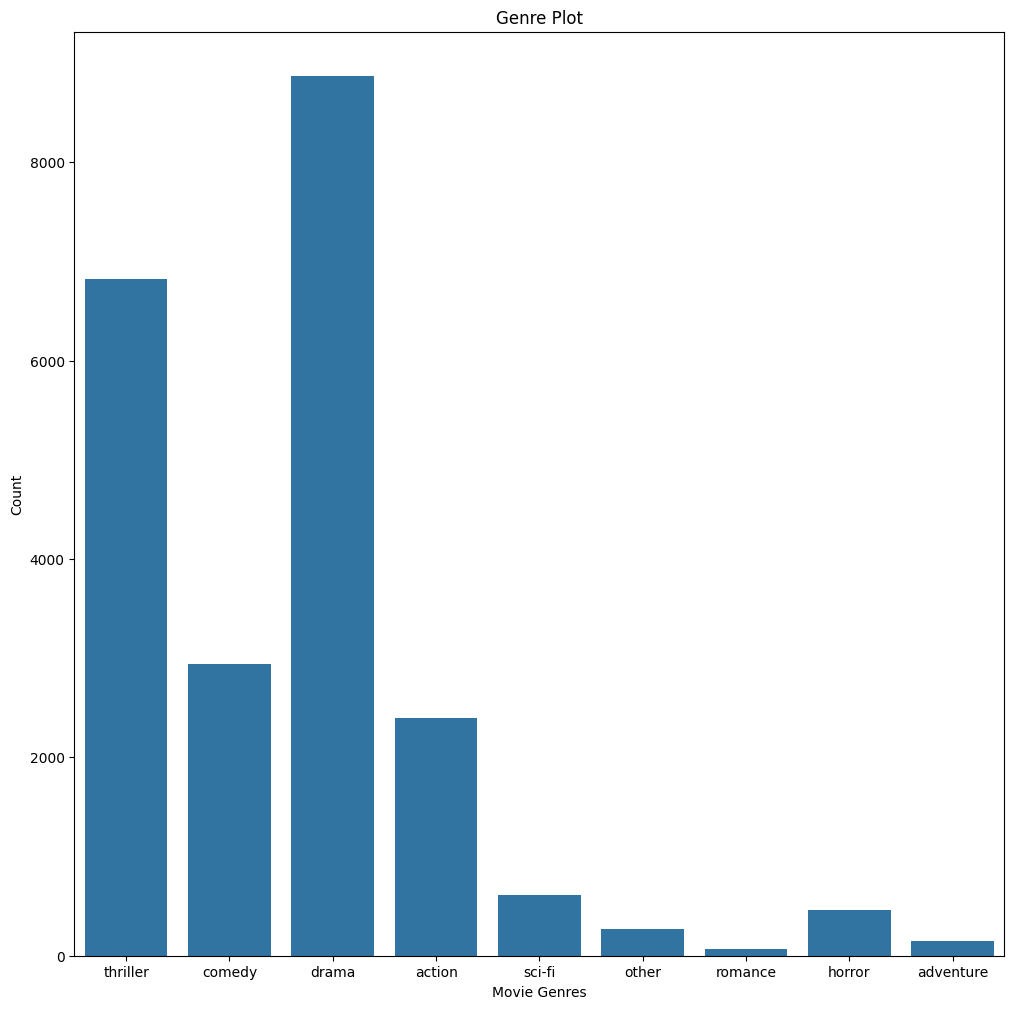

In [7]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

Data Cleaning and Preprocessing

In [8]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [9]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [10]:
# Finding any NaN values
df.isna().any()
     

id       False
text     False
genre    False
dtype: bool

In [11]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [12]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thanuj123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df.shape

(22579, 2)

In [14]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [15]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [16]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [17]:
len(corpus)

22579

In [18]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

1. It imports the WordCloud class from the wordcloud library
2. It creates a WordCloud object with:
   - A white background
   - Dimensions of 3000x2500 pixels
   - Text content from a variable called `drama` (which would contain drama-related text)
3. It sets up a matplotlib figure with an 8x8 size
4. It displays the word cloud image
5. It turns off the axis lines
6. It adds a title "Words which indicate 'DRAMA' genre"
7. It renders the visualization

This visualization technique sizes words based on their frequency in the text - more frequent words appear larger. It's an effective way to visually represent the most common words in drama scripts or descriptions, helping to identify key themes and language patterns in the drama genre.

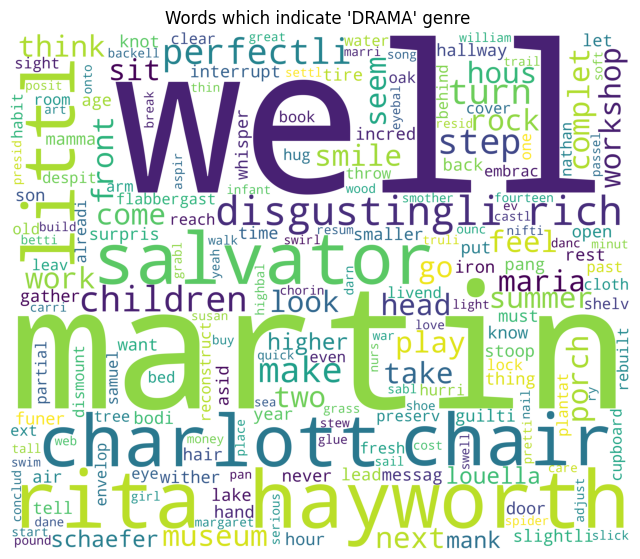

In [22]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

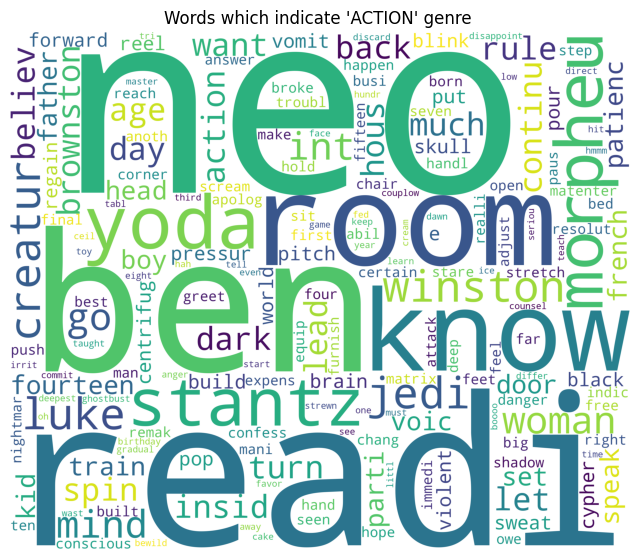

In [23]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

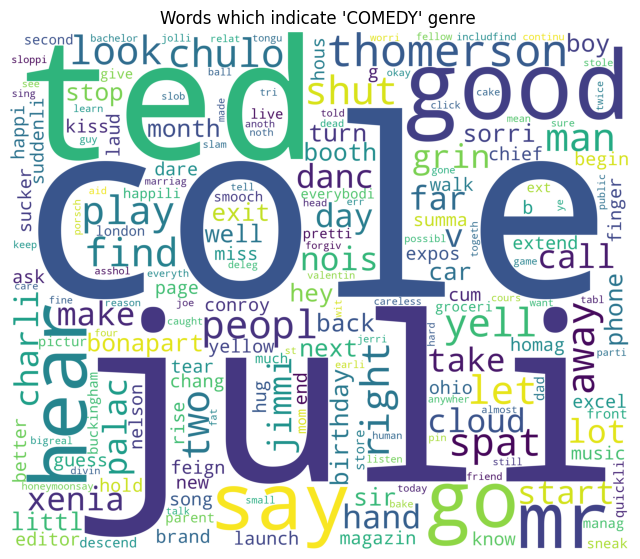

In [24]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [25]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [26]:
y = df['genre'].values

Model Building

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


Multinomial Naive Bayes

In [28]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
     
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)
     

# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
     

---- Score ----
Accuracy score is: 89.57%


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [30]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]],
      dtype=int64)

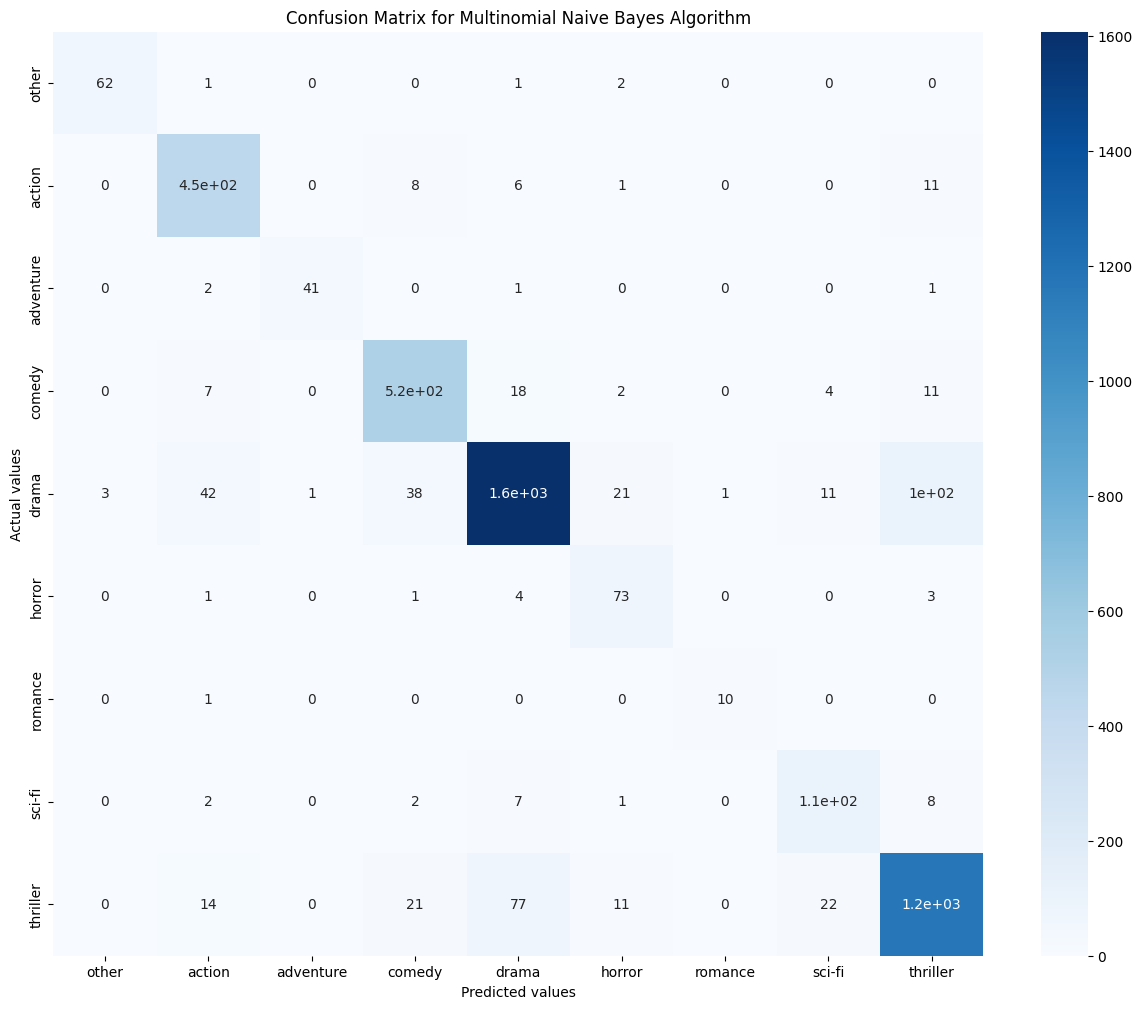

In [31]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))
     


Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [33]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)
     

MultinomialNB(alpha=0.1)

Predictions

In [34]:

def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [35]:
# For generating random integer
from random import randint

In [36]:
# Loading test dataset
test = pd.read_csv('kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [37]:
test.shape

(5589, 2)

In [38]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [39]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: e. Standing with Fay at Epcot Center. DICK V.O. That's him all right. PULL BACK TO REVEAL... INT. DICK ALLEN'S OFFICE NIGHT A sign on the door reads DICK ALLEN, CUSTOMER RELATIONS. A bank of video monitors show the floor of the casino. Chili sits across the desk from DICK ALLEN lots of jewelry, a giant NEON COWGIRL out the window behind him. DICK Called himself Larry DeMille. Hit on every showgirl in town. Would tell 'em he was the 'Martinizing King of Miami'. What a moron. He returns the snapshot to Chili. DICK Anyway, you want this guy, he's in L.A. We put him on a flight after he spanked one a my cocktail girls in the Keno room. CHILI Leo spanked a waitress? DICK Apparently, way it went, he invited her to come to Santa Anita to play the ponies with him. She told him what to do with that and he gave her one on the tush. My guess, he's by his lonesome at the track right now. Chili nods. DICK Hey, Chil? Since you're goin' out to L.A. anyway. CHILI What've you got? DICK Guy owes

In [40]:

# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: s not an enemy trying to evade you. He's just an animal. MAJOR HICKS What are you suggesting? NICK When I needed to catch earthworms, I knew the best way to catch them was not to chase them. I had to draw them out. ANGLE SOLDIERS DARKNESS Still moving deeper into the tunnel we get the feeling these soldiers may just waken a sleeping giant. BACK TO TEAM Nick moves to the edge of the platform, looking off into the dark tunnel. NICK All we need to do is find out what it wants, what it needs, and he'll come to us. ANGLE SOLDIERS DARKNESS The lead Soldier SEES something. Cautiously he moves forward thinking he's onto something. We HEAR something MOVING in the darkness. We FOLLOW his beam as the noise grows clearer. The beam falls onto something on the floor... A FISH Flopping on the ground is a large FISH. As the beam moves farther along we see two, no, three fish ahead. CUT TO 62 EXT. NEW YORK CITY STREET POST SUNSET MAGIC HOUR 62 A battalion of armored TANKS roll down this deserte

In [41]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  imitation on this gig. I got yelled at for quitting at eight . Under Luke's patient exterior, the stress is showing. As Ben watches, he replaces a key piece of the turret... LUKE Yeh, well, I'll be up all night on this brief. And then... He shoots her a really sorry look... LUKE I've got a morning plane to Boston for the depo. Back Sunday night. Wow. They lock eyes in the bond of 'what are we gonna do?' RACHEL No problem. LUKE I made that paella you liked. It's on the stove. She kisses Ben's head, Luke's mouth, that one lingering a little. Then, down the hall to... ...the kitchen. Annabelle sits with her homework stacked, untouched. Staring out the dark window. Clearly, this is worse than death. RACHEL Lemme guess. A bad hair day. Annabelle TURNS like a hunted animal... ANNABELLE She told me to keep ignoring him! So I did it! Not a good result, huh? ANNABELLE You know what that creep and his frogfaced footmen are calling me now ? In front of the whole world ? Frosty, the Snow 

In [42]:

# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ng in your mouth. That's just for TV shows. It could be poison for all you know. GRANGER cowed It ain't cocaine. MACKELWAY I know. It's lime. DYLAN Lime? GRANGER What are those stains? MACKELWAY You say Speck lived in Roswell? Dylan nods, Mack turns to Wallace MACKELWAY You got a judge on the hook? We'll need a search warrant pronto. WALLACE nods In the morning. CUT TO EXT. SPECK HOUSE DAY Title card Roswell, New Mexico. A suburban ranch style home all seems normal, even banal, until the front door opens And TWO EMS WORKERS wearing facemasks emerge carrying a green body bag. They navigate the front steps, step past a Huffy bike with training wheels, place the body bag next to four others on the front lawn. Hudspeth County Police and EMS vehicles ring the house. Onlookers and press are ringed off by a yellow crime scene cordon. A Honda Civic turns onto the street, glides past neighbors on porches, police cars, drives up to the yellow tape. A fortiesh WOMAN gets out of the front 

In [43]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: rings to a total of four murders police feel may have been committed by Baltimore's first serial killer... DAD looks at MOM in stunned disbelief. DAD Beverly! Not the Sterners! MOM Calmly It's a shame. But they should brush their teeth, honey. ANNOUNCER On radio This just came in. Police Lieutenant Ronald Habbler has publicly named a suspect in the serial killer case and it's a shocker! She, that's right, she has been identified as Beverly R. Sutphin of 2815 Calverton Court... MISTY Oh God! In despair Now I'll never get a boyfriend! DAD Nervously Beverly, I've been reading all about it... is it menopause? MOM Oh, honey! CHIP Tell me the truth, Mom! It's ok with me, really! Are you a serial killer? MOM Chip, the only cereal I know about is Rice Krispies. Sutphin car pulls to a stop at a red light next to car full of churchgoers. MOM turns to smile at them and all the churchgoers scream in horror at the sight of her face. DAD Lovingly, painfully Don't worry, Beverly. We're going 

This Python script implements a **movie genre classification system** using **Naive Bayes (MultinomialNB)** and **CountVectorizer** for text feature extraction. It includes functions to train, save, load, and use a classifier for predicting the genre of a given movie script.  

### **Key Components:**
1. **Genre Mapping:**  
   - A dictionary (`genre_mapper`) maps genre names to numerical labels.  

2. **Model Saving & Loading:**  
   - `save_model()`: Saves the trained Naive Bayes classifier and CountVectorizer using `joblib`.  
   - `load_model()`: Loads the saved model and vectorizer for later use.  

3. **Genre Prediction:**  
   - `predict_genre()`:  
     - Preprocesses a given script (removes special characters, converts to lowercase, removes stopwords, and applies stemming).  
     - Uses the trained vectorizer to convert text into a numerical representation.  
     - Predicts the genre using the Naive Bayes classifier.  

4. **Main Execution:**  
   - Trains the Naive Bayes classifier using `CountVectorizer` on movie script data (`corpus`).  
   - Saves the trained model.  
   - Loads the model and tests it on a sample script, predicting its genre.  

### **Use Case:**  
This script is useful for **automatically classifying movie scripts** into predefined genres based on textual content.

In [44]:
import joblib
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Genre Mapping (same as in the original script)
genre_mapper = {
    'other': 0, 
    'action': 1, 
    'adventure': 2, 
    'comedy': 3, 
    'drama': 4, 
    'horror': 5, 
    'romance': 6, 
    'sci-fi': 7, 
    'thriller': 8
}

def save_model(classifier, vectorizer, filename='movie_genre_classifier.joblib'):
    """
    Save the trained model, vectorizer, and genre mapper
    
    Parameters:
    - classifier: Trained Naive Bayes classifier
    - vectorizer: Fitted CountVectorizer
    - filename: Path to save the model
    """
    model_data = {
        'classifier': classifier,
        'vectorizer': vectorizer,
        'genre_mapper': genre_mapper
    }
    
    joblib.dump(model_data, filename)
    print(f"Model saved successfully to {filename}")

def load_model(filename='movie_genre_classifier.joblib'):
    """
    Load the saved model
    
    Parameters:
    - filename: Path to the saved model file
    
    Returns:
    - Loaded model components
    """
    model_data = joblib.load(filename)
    return (
        model_data['classifier'], 
        model_data['vectorizer'], 
        model_data['genre_mapper']
    )

def predict_genre(sample_script, classifier, vectorizer, genre_mapper):
    """
    Predict genre for a new script
    
    Parameters:
    - sample_script: Text of the script to classify
    - classifier: Trained Naive Bayes classifier
    - vectorizer: Fitted CountVectorizer
    - genre_mapper: Dictionary mapping genres to integers
    
    Returns:
    - Predicted genre
    """
    # Preprocess the script
    ps = PorterStemmer()
    sample_script = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    
    # Remove stopwords
    sample_script_words = [
        word for word in sample_script_words 
        if word not in set(stopwords.words('english'))
    ]
    
    # Stem words
    final_script_words = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script_words)
    
    # Vectorize and predict
    vectorized_script = vectorizer.transform([final_script]).toarray()
    prediction = classifier.predict(vectorized_script)[0]
    
    # Reverse mapping to get genre name
    reverse_mapper = {v: k for k, v in genre_mapper.items()}
    return reverse_mapper[prediction]

def main():
    # Assuming you've already trained the model and have these variables
    # X_train, y_train from your previous training steps
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.naive_bayes import MultinomialNB
    
    # Recreate vectorizer and classifier (example)
    cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
    X = cv.fit_transform(corpus).toarray()  # 'corpus' from your previous preprocessing
    y = df['genre'].values  # 'df' from your previous data preparation
    
    # Train the classifier
    classifier = MultinomialNB(alpha=0.1)
    classifier.fit(X, y)
    
    # Save the model
    save_model(classifier, cv, 'movie_genre_classifier.joblib')
    
    # Example of loading and using the model
    loaded_classifier, loaded_vectorizer, loaded_genre_mapper = load_model('movie_genre_classifier.joblib')
    
    # Test prediction
    sample_script = "In a world of high-stakes espionage, one agent must uncover a global conspiracy."
    predicted_genre = predict_genre(
        sample_script, 
        loaded_classifier, 
        loaded_vectorizer, 
        loaded_genre_mapper
    )
    print(f"Predicted Genre: {predicted_genre}")

if __name__ == "__main__":
    main()

Model saved successfully to movie_genre_classifier.joblib
Predicted Genre: action


Your "Movie Script Analyzer & Story Generator" is a web application with three main functions:

1. **Genre Prediction**: Takes movie script text and predicts its genre using machine learning, showing probabilities for different genres.

2. **Story Generator**: Creates complete stories based on your specifications. You select the genre, provide a concept, and choose tone and complexity. The app uses Cohere's AI to generate a full 400-600 word story with proper structure.

3. **Story Improvement**: Enhances existing stories by focusing on specific aspects like character development or plot complexity.

The app uses NLP techniques for text analysis, Cohere's API for creative generation, and Gradio for the user interface with a custom design. Your recent update fixed the story generation problem by providing clearer instructions to the AI and increasing the maximum output length.

In [2]:
import gradio as gr
import joblib
import re
import nltk
import cohere
import json
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np

# Download necessary NLTK resources
nltk.download('stopwords', quiet=True)

# Set up Cohere API 
co = cohere.Client('d9Ts23tlo5IpStdDGSBimGil3UIpl5m16A6itdwt')  # Replace with your actual Cohere API key

class MovieGenreClassifier:
    def __init__(self, model_path='movie_genre_classifier.joblib'):
        """
        Initialize the classifier by loading the saved model
        """
        # Load saved model components
        saved_data = joblib.load(model_path)
        self.classifier = saved_data['classifier']
        self.vectorizer = saved_data['vectorizer']
        self.genre_mapper = saved_data['genre_mapper']
        
        # Reverse mapper for human-readable genre names
        self.reverse_mapper = {v: k for k, v in self.genre_mapper.items()}
        
        # Initialize text preprocessing components
        self.ps = PorterStemmer()
        self.stopwords = set(stopwords.words('english'))

    def preprocess_text(self, text):
        """
        Preprocess input text for genre prediction
        """
        # Clean special characters
        text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=text)
        text = text.lower()
        
        # Tokenize
        words = text.split()
        
        # Remove stopwords
        words = [word for word in words if word not in self.stopwords]
        
        # Stem words
        words = [self.ps.stem(word) for word in words]
        
        return ' '.join(words)

    def predict_genre(self, script):
        """
        Predict genre for a given script
        """
        # Preprocess the script
        processed_script = self.preprocess_text(script)
        
        # Vectorize
        vectorized_script = self.vectorizer.transform([processed_script]).toarray()
        
        # Predict
        prediction = self.classifier.predict(vectorized_script)[0]
        
        # Get genre name
        return self.reverse_mapper[prediction]

    def get_genre_probabilities(self, script):
        """
        Get probabilities for all genres
        """
        # Preprocess the script
        processed_script = self.preprocess_text(script)
        
        # Vectorize
        vectorized_script = self.vectorizer.transform([processed_script]).toarray()
        
        # Get probabilities
        probabilities = self.classifier.predict_proba(vectorized_script)[0]
        
        # Create a dictionary of genre probabilities
        genre_probs = {
            genre: round(prob * 100, 2) 
            for genre, prob in zip(self.reverse_mapper.values(), probabilities)
        }
        
        return genre_probs

def generate_story_with_cohere(genre, initial_concept, tone='engaging', complexity='moderate'):
    """
    Generate a story using Cohere's generation model
    """
    try:
        # More detailed prompt to encourage full story generation
        prompt = f"""Write a complete {complexity} complexity {genre} story based on this concept: {initial_concept}

Story Guidelines:
- Genre: {genre}
- Tone: {tone}
- Length: A complete narrative of 400-600 words
- Structure:
  1. Clear introduction with compelling characters
  2. Engaging plot development
  3. Rising action and conflict
  4. Climax
  5. Resolution
  6. Genre-specific narrative elements

Please write the FULL story, not just a title or outline:"""

        # Call Cohere API with increased tokens and adjusted generation parameters
        response = co.generate(
            model='command-r-08-2024',
            prompt=prompt,
            max_tokens=800,  # Increased token limit
            temperature=0.7,
            num_generations=1,
            stop_sequences=["\n\n\n"]  # Stop at multiple newlines to prevent multiple generations
        )

        # Extract the generated story, ensuring it's not truncated
        generated_story = response.generations[0].text.strip()
        
        # Optional: Additional validation to ensure story length
        if len(generated_story.split()) < 100:  # If story is too short
            return "Story generation failed. Please try again."
        
        return generated_story

    except Exception as e:
        return f"Story generation error: {str(e)}"

def improve_story_with_cohere(original_story, improvement_focus):
    """
    Improve the story based on specific focus areas using Cohere
    """
    try:
        prompt = f"""Improve the following story, focusing on: {improvement_focus}

Original Story:
{original_story}

Improved Story:"""

        # Call Cohere API
        response = co.generate(
            model='command-r-08-2024',
            prompt=prompt,
            max_tokens=700,
            temperature=0.7,
            stop_sequences=["\n\n"]
        )

        # Extract the improved story
        improved_story = response.generations[0].text.strip()
        return improved_story

    except Exception as e:
        return f"Story improvement error: {str(e)}"

def create_advanced_gradio_interface():
    # Initialize the classifier
    classifier = MovieGenreClassifier()

    def predict_and_analyze(script):
        """
        Predict genre, provide probabilities and explanation
        """
        # Predict genre
        predicted_genre = classifier.predict_genre(script)
        
        # Get probabilities
        genre_probs = classifier.get_genre_probabilities(script)
        
        # Create probability explanation
        prob_explanation = "\n".join([
            f"{genre.capitalize()}: {prob}%" 
            for genre, prob in sorted(genre_probs.items(), key=lambda x: x[1], reverse=True)
        ])
        
        # Genre descriptions
        genre_descriptions = {
            'action': 'High-energy scripts with intense physical conflict and excitement.',
            'adventure': 'Storylines involving exploration, risk, and exciting journeys.',
            'comedy': 'Scripts focused on humor, wit, and amusing situations.',
            'drama': 'Serious, character-driven narratives exploring emotional conflicts.',
            'horror': 'Stories designed to frighten, shock, and create a sense of terror.',
            'romance': 'Narratives centered on love, relationships, and emotional connections.',
            'sci-fi': 'Speculative stories involving futuristic or technological themes.',
            'thriller': 'Suspenseful narratives with tension, excitement, and unexpected twists.',
            'other': 'Unique or hard-to-classify narrative styles.'
        }
        
        explanation = genre_descriptions.get(predicted_genre, 'Unique genre classification')
        
        return predicted_genre, prob_explanation, explanation

    def generate_story(genre, concept, tone, complexity):
        """
        Generate a story based on user specifications
        """
        generated_story = generate_story_with_cohere(genre, concept, tone, complexity)
        return generated_story

    def improve_story(original_story, improvement_focus):
        """
        Improve the story based on user's focus
        """
        improved_story = improve_story_with_cohere(original_story, improvement_focus)
        return improved_story

    # Create Gradio interface with multiple tabs
    with gr.Blocks(theme="soft") as interface:
        # Custom CSS to set Times New Roman font
        interface.css = """
        /* Background and overall theme */
    body, .gradio-container {
        font-family: 'Georgia', 'Times New Roman', Times, serif !important;
        background-image: url('background .jpg');
        background-size: cover;
        background-position: center;
        background-attachment: fixed;
        color: #2c3e50;
        line-height: 1.6;
        position: relative;
    }

    /* Semi-transparent overlay to improve readability */
    body::before {
        content: "";
        position: fixed;
        top: 0;
        left: 0;
        width: 100%;
        height: 100%;
        background-color: rgba(255, 255, 255, 0.7);
        z-index: -1;
    }

    /* Headings */
    h1, h2, h3, h4, h5, h6 {
        font-family: 'Playfair Display', 'Georgia', serif !important;
        color: #1a5f7a;
        font-weight: 600;
        margin-bottom: 0.8em;
        text-shadow: 1px 1px 2px rgba(255,255,255,0.8);
    }

    /* Main title styling */
    h1 {
        text-align: center;
        font-size: 2.5em;
        color: #2c3e50;
        border-bottom: 3px solid #3498db;
        padding-bottom: 10px;
        margin-bottom: 1.5em;
        background-color: rgba(255,255,255,0.8);
        padding: 15px;
        border-radius: 10px;
    }

    /* Buttons */
    .gradio-container .primary-button, .gradio-container .secondary-button {
        font-family: 'Arial', sans-serif;
        padding: 10px 20px;
        border-radius: 8px;
        transition: all 0.3s ease;
        font-weight: bold;
        background-color: #3498db;
        color: white;
        border: none;
        box-shadow: 0 4px 6px rgba(0,0,0,0.2);
    }

    .gradio-container .primary-button:hover {
        background-color: #2980b9;
        transform: scale(1.05);
        box-shadow: 0 6px 8px rgba(0,0,0,0.3);
    }

    /* Textboxes and Inputs */
    .gradio-container textarea, 
    .gradio-container input[type="text"], 
    .gradio-container .input-container {
        background-color: rgba(255,255,255,0.9);
        border: 2px solid #e0e0e0;
        border-radius: 8px;
        padding: 12px;
        font-family: 'Georgia', serif;
        font-size: 16px;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
        transition: all 0.3s ease;
    }

    .gradio-container textarea:focus, 
    .gradio-container input[type="text"]:focus {
        border-color: #3498db;
        outline: none;
        box-shadow: 0 4px 8px rgba(52, 152, 219, 0.3);
    }

    /* Dropdown Styling */
    .gradio-container .dropdown {
        background-color: rgba(255,255,255,0.9);
        border: 2px solid #e0e0e0;
        border-radius: 8px;
        font-family: 'Arial', sans-serif;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
    }

    /* Tabs */
    .gradio-container .tabitem {
        background-color: rgba(255,255,255,0.9);
        border-radius: 12px;
        padding: 20px;
        box-shadow: 0 6px 12px rgba(0, 0, 0, 0.2);
    }

    /* Responsive Design */
    @media (max-width: 600px) {
        h1 {
            font-size: 2em;
        }
        
        .gradio-container textarea, 
        .gradio-container input[type="text"] {
            font-size: 14px;
        }
    }

    /* Scrollbar Styling */
    .gradio-container *::-webkit-scrollbar {
        width: 10px;
    }

    .gradio-container *::-webkit-scrollbar-track {
        background: #f1f1f1;
        border-radius: 10px;
    }

    .gradio-container *::-webkit-scrollbar-thumb {
        background: #3498db;
        border-radius: 10px;
    }

    .gradio-container *::-webkit-scrollbar-thumb:hover {
        background: #2980b9;
    }

    /* Gradient overlay for extra depth */
    .gradio-container {
        background-blend-mode: soft-light;
    }
        """

        gr.Markdown("# 🎬 Advanced Movie Script Analyzer & Story Generator")
        
        with gr.Tab("Genre Prediction"):
            with gr.Row():
                script_input = gr.Textbox(
                    lines=10, 
                    placeholder="Paste your movie script here (about 1000 characters recommended)",
                    label="Movie Script"
                )
                predict_btn = gr.Button("Predict Genre")
            
            with gr.Row():
                genre_output = gr.Textbox(label="Predicted Genre")
                probabilities_output = gr.Textbox(label="Genre Probabilities")
                description_output = gr.Textbox(label="Genre Description")
            
            predict_btn.click(
                predict_and_analyze, 
                inputs=script_input, 
                outputs=[genre_output, probabilities_output, description_output]
            )

        with gr.Tab("Story Generator"):
            with gr.Column():
                genre_dropdown = gr.Dropdown(
                    choices=['action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller', 'other'],
                    label="Select Genre"
                )
                concept_input = gr.Textbox(
                    lines=3, 
                    placeholder="Enter a brief story concept",
                    label="Story Concept"
                )
                tone_dropdown = gr.Dropdown(
                    choices=['serious', 'humorous', 'dark', 'inspiring', 'mysterious', 'engaging'],
                    label="Story Tone",
                    value='engaging'
                )
                complexity_dropdown = gr.Dropdown(
                    choices=['simple', 'moderate', 'complex'],
                    label="Story Complexity",
                    value='moderate'
                )
                generate_btn = gr.Button("Generate Story")
                story_output = gr.Textbox(
                    lines=15, 
                    label="Generated Story"
                )

            generate_btn.click(
                generate_story, 
                inputs=[genre_dropdown, concept_input, tone_dropdown, complexity_dropdown], 
                outputs=story_output
            )

        with gr.Tab("Story Improvement"):
            with gr.Column():
                original_story_input = gr.Textbox(
                    lines=10, 
                    placeholder="Paste the original story here",
                    label="Original Story"
                )
                improvement_dropdown = gr.Dropdown(
                    choices=[
                        'Character Development', 
                        'Plot Complexity', 
                        'Dialogue Quality', 
                        'Narrative Flow', 
                        'Emotional Depth', 
                        'Thematic Consistency'
                    ],
                    label="Improvement Focus"
                )
                improve_btn = gr.Button("Improve Story")
                improved_story_output = gr.Textbox(
                    lines=15, 
                    label="Improved Story"
                )

            improve_btn.click(
                improve_story, 
                inputs=[original_story_input, improvement_dropdown], 
                outputs=improved_story_output
            )

        # Add some examples
        gr.Examples(
            [
                ["In a world of high-stakes espionage, one agent must uncover a global conspiracy."],
                ["Two lovers from different worlds struggle to find happiness amid societal pressures."],
                ["A team of scientists discover a mysterious alien artifact that could change humanity forever."]
            ],
            inputs=[script_input],
            outputs=[genre_output, probabilities_output, description_output],
            fn=predict_and_analyze,
            cache_examples=True
        )

    return interface

def main():
    # Create and launch the interface
    interface = create_advanced_gradio_interface()
    interface.launch(share=True)

if __name__ == "__main__":
    main()

* Running on local URL:  http://127.0.0.1:7861
Using cache from 'd:\3 2 year\NLP LAB\labtherory\.gradio\cached_examples\62' directory. If method or examples have changed since last caching, delete this folder to clear cache.

* Running on public URL: https://d0447f030df47f2926.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
